## Model Development

Import libraries

In [296]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint, uniform
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

sns.set_style(style = 'whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [297]:
df = pickle.load(open("../assets/clean_df.pkl", "rb"))
df.head()

,neo,hazardous,epoch_cal,eccentricity_(e),semi_major_axis_(a),perihelion_dist_(q),inclination_(i),perihelion_arg_(w),abs_magnitude_(H),mean_anomaly,...,asc_node_long_(deg),orbital_per_(y),first_obs,last_obs,class_APO,class_ATE,class_IEO,stand_grav_param,rel_velocity_Q,rel_velocity_q
0,1,0,20200531.0,0.222951,1.458046,1.132973,10.830543,178.882294,10.4,271.071732,...,304.299327,1.760617,1893-10-29,2019-02-13,0,0,0,13.866566,11.661046,18.352633
1,1,0,20200531.0,0.546558,2.638602,1.196452,11.567485,156.176338,15.4,140.273422,...,183.866950,4.286167,1911-10-04,2020-02-27,0,0,0,82.182090,14.335015,48.892609
2,1,0,20200531.0,0.570332,2.473737,1.062886,9.393854,350.495585,13.8,294.579157,...,110.434218,3.890796,1918-02-03,2019-08-27,0,0,0,67.719856,12.982886,47.449251
3,1,0,20200531.0,0.533046,2.664725,1.244303,26.677643,132.364631,9.4,4.817745,...,215.546826,4.349974,1924-10-23,2019-08-17,0,0,0,84.647180,14.755655,48.443972
4,1,0,20200531.0,0.435285,1.919498,1.083970,11.876536,26.694797,17.7,38.522409,...,171.326998,2.659437,1932-03-12,2020-01-24,0,0,0,31.638696,12.080367,30.703567


In [298]:
df.shape

(2917, 24)

In [299]:
df.isnull().sum()

neo                            0
hazardous                      0
epoch_cal                      0
eccentricity_(e)               0
semi_major_axis_(a)            0
perihelion_dist_(q)            0
inclination_(i)                0
perihelion_arg_(w)             0
abs_magnitude_(H)              0
mean_anomaly                   0
aphelion_dist_(Q)              0
mean_motion_(n)                0
min_orbit_intersection_dist    0
t_jupiter                      0
asc_node_long_(deg)            0
orbital_per_(y)                0
first_obs                      0
last_obs                       0
class_APO                      0
class_ATE                      0
class_IEO                      0
stand_grav_param               0
rel_velocity_Q                 0
rel_velocity_q                 0
dtype: int64

In [300]:
c = ['#B275FF', '#757DFF', '#5E3BA8', '#503098', '#41258A', '#251C65']

### Baseline Accuracy

Based on the class distribution, the baseline accuracy score is about 90%. The baselines suggests that if we randomly select an observation, then there is a 90% chance that the asteroid selected is accurately classified as not hazardous.

In [301]:
df['hazardous'].value_counts(normalize=True)

0    0.737744
1    0.262256
Name: hazardous, dtype: float64

### Train/Test Split

In [302]:
# Assign features to a variable
features = df.describe().columns

In [303]:
features

Index(['neo', 'hazardous', 'epoch_cal', 'eccentricity_(e)',
       'semi_major_axis_(a)', 'perihelion_dist_(q)', 'inclination_(i)',
       'perihelion_arg_(w)', 'abs_magnitude_(H)', 'mean_anomaly',
       'aphelion_dist_(Q)', 'mean_motion_(n)', 'min_orbit_intersection_dist',
       't_jupiter', 'asc_node_long_(deg)', 'orbital_per_(y)', 'class_APO',
       'class_ATE', 'class_IEO', 'stand_grav_param', 'rel_velocity_Q',
       'rel_velocity_q'],
      dtype='object')

In [304]:
# Create X and y
X = df[features].drop(columns='hazardous')
y = df['hazardous']

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, stratify=y)

Standardizes data (since there are various units in the dataset)

In [306]:
# Instantiate Standard Scalar
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Logistic Regression Model

In [307]:
logreg_model = LogisticRegression(solver='liblinear')
logreg_model.fit(X_train_sc, y_train)

print(f'Logistic Regression Intercept: \n{logreg_model.intercept_}\n')

print(f'Logistic Regression Coefficient: \n{logreg_model.coef_}\n')

print(f'Logistic Regression predicted values: \n{logreg_model.predict(X_train_sc)}\n')

print(f'Logistic Regression predicted probabilities: \n{logreg_model.predict_proba(X_train_sc)}\n')

Logistic Regression Intercept: 
[-7.52970905]

Logistic Regression Coefficient: 
[[ 0.          0.05382308  0.49291955 -0.10144543  0.29991148  0.03866579
   0.01286364 -0.21724348  0.02415867 -0.19723761  0.11046119 -9.20714427
   0.03549809  0.05013064 -0.05031619  0.26311661  0.08074523  0.18532951
   0.25676381  0.12203394 -0.1973777 ]]

Logistic Regression predicted values: 
[0 0 0 ... 0 0 1]

Logistic Regression predicted probabilities: 
[[9.98782126e-01 1.21787411e-03]
 [9.99999545e-01 4.54791237e-07]
 [1.00000000e+00 2.02061345e-10]
 ...
 [9.99327300e-01 6.72700413e-04]
 [9.99411840e-01 5.88160063e-04]
 [1.81380037e-01 8.18619963e-01]]



In [308]:
logreg_preds = logreg_model.predict(X_train_sc)

In [309]:
print(f'Logistic Regression Accuracy Score: {logreg_model.score(X_test_sc, y_test)}')

Logistic Regression Accuracy Score: 0.9767123287671233


In [310]:
np.exp(logreg_model.coef_)

array([[1.00000000e+00, 1.05529788e+00, 1.63708881e+00, 9.03530487e-01,
        1.34973933e+00, 1.03942304e+00, 1.01294673e+00, 8.04734008e-01,
        1.02445285e+00, 8.20995533e-01, 1.11679301e+00, 1.00320121e-04,
        1.03613567e+00, 1.05140844e+00, 9.50928703e-01, 1.30097842e+00,
        1.08409466e+00, 1.20361498e+00, 1.29273976e+00, 1.12979245e+00,
        8.20880531e-01]])

In [311]:
# Match coeffecients to their corresponding feature
for i in range(len(X.columns)):
    print(f'{X.columns[i]}: {np.exp(logreg_model.coef_[0][i])}')

neo: 1.0
epoch_cal: 1.0552978847440762
eccentricity_(e): 1.6370888067333054
semi_major_axis_(a): 0.9035304873394981
perihelion_dist_(q): 1.3497393271621887
inclination_(i): 1.0394230428328997
perihelion_arg_(w): 1.0129467314752618
abs_magnitude_(H): 0.8047340077025986
mean_anomaly: 1.0244528548785767
aphelion_dist_(Q): 0.820995532888271
mean_motion_(n): 1.1167930070070897
min_orbit_intersection_dist: 0.0001003201210345294
t_jupiter: 1.0361356738368874
asc_node_long_(deg): 1.0514084419100638
orbital_per_(y): 0.9509287032955491
class_APO: 1.3009784230646217
class_ATE: 1.084094663600986
class_IEO: 1.203614977247359
stand_grav_param: 1.292739757290049
rel_velocity_Q: 1.1297924483666935
rel_velocity_q: 0.8208805314638198


In [312]:
# Import roc_auc_score.
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC.
roc_auc_score(logreg_preds_df['true_values'], 
             logreg_preds_df['pred_probs'])

0.9785797507558441

In [313]:
# Let's create a dataframe called logreg_preds_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

logreg_pred_proba = [i[1] for i in logreg_model.predict_proba(X_test_sc)]

logreg_preds_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': logreg_pred_proba})

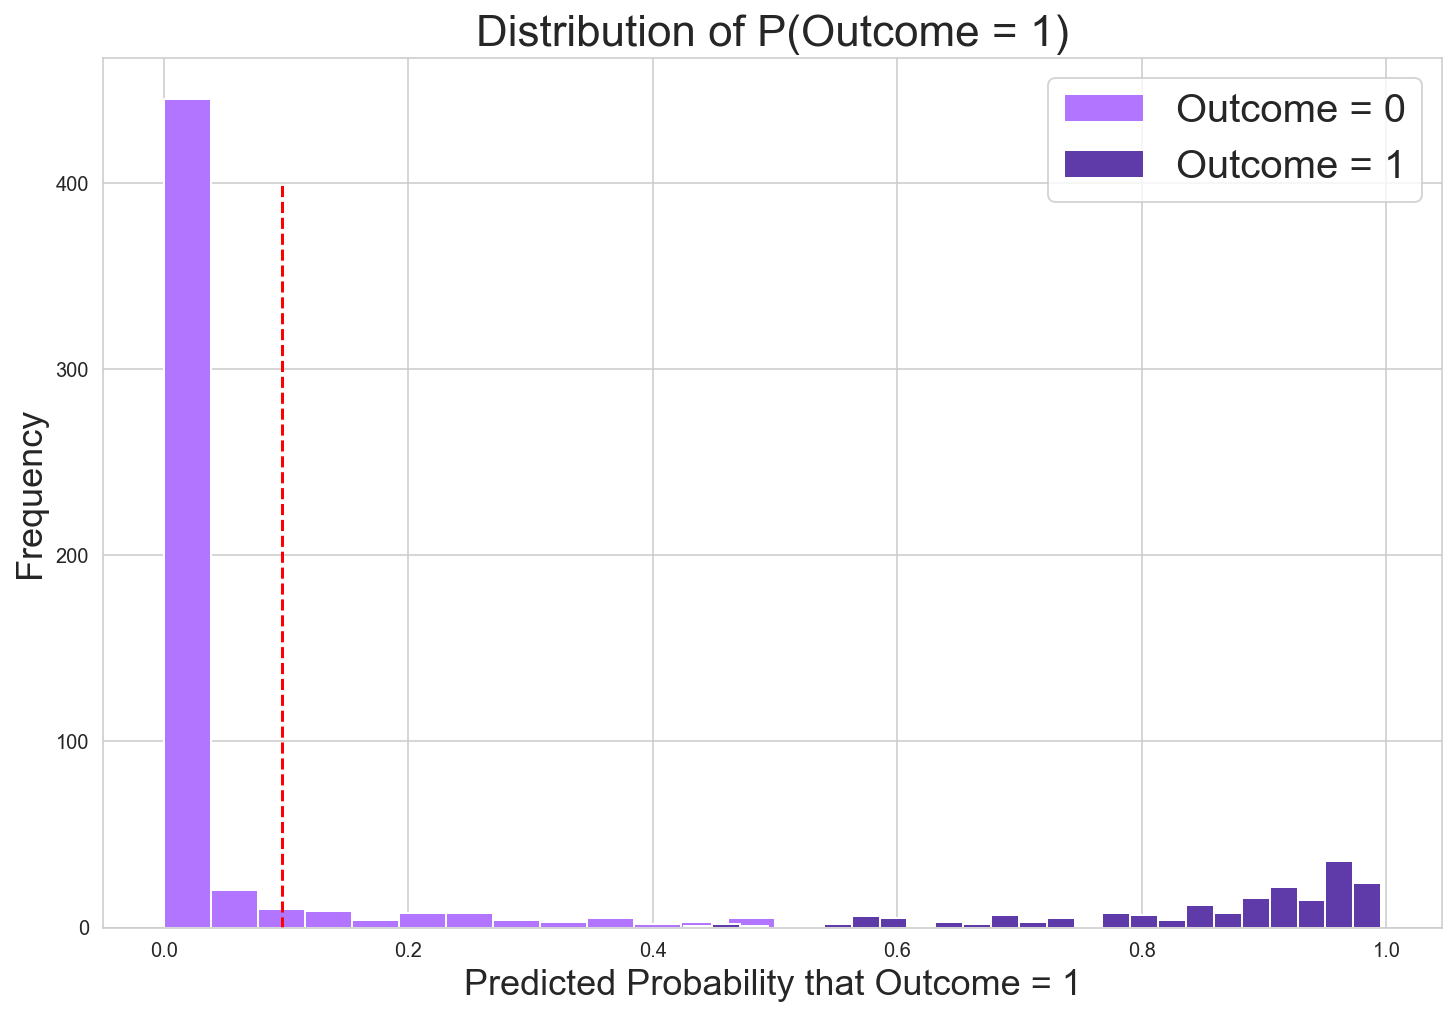

In [317]:
# Graph from Lesson 4.04
# Create figure.
plt.figure(figsize = (12,8))

# Create two histograms of observations.
plt.hist(logreg_preds_df[logreg_preds_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color=c[0],
         label='Outcome = 0')
plt.hist(logreg_preds_df[logreg_preds_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color=c[2],
         label='Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.097
plt.vlines(x=0.097,
           ymin = 0,
           ymax = 400,
           color='r',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

### KNN Model

In [318]:
# Instantiate KNN
knn_model = KNeighborsClassifier()

In [319]:
knn_model.fit(X_train_sc, y_train)
print(f'KNN Train Accuracy Score:\n{knn_model.score(X_train_sc, y_train)}\n')

print(f'KNN Test Accuracy Score:\n{knn_model.score(X_test_sc, y_test)}\n')

KNN Train Accuracy Score:
0.9062642889803384

KNN Test Accuracy Score:
0.8561643835616438



In [320]:
knn_preds = knn_model.predict(X_test_sc)

### SVC

### Random Forest Classifier

### Bootstrapping